## 1. Exploratory Data Analysis (EDA)

In [1]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("rohitgrewal/airlines-flights-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/airlines-flights-data


In [2]:
os.listdir(path)

['airlines_flights_data.csv']

In [3]:
full_path = os.path.join(path,os.listdir(path)[0])

In [4]:
import pandas as pd
df = pd.read_csv(full_path)

In [5]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [7]:
df = df.drop('index', axis=1)

In [8]:

df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [9]:
df.isnull().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


In [10]:
df.duplicated().sum()

np.int64(0)

### Visualizations

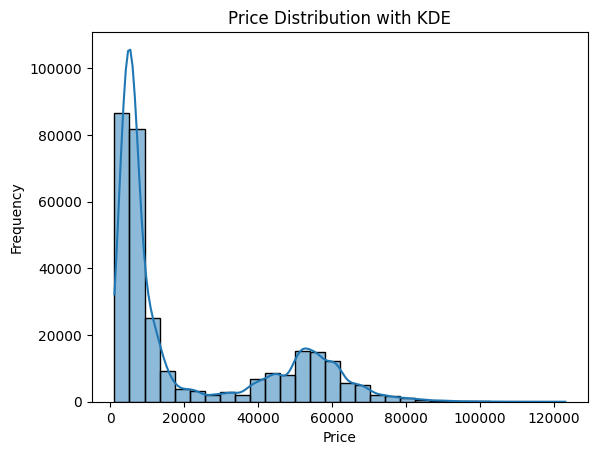

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Price histogram
sns.histplot(df['price'], kde=True, bins=30)
plt.title("Price Distribution with KDE")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

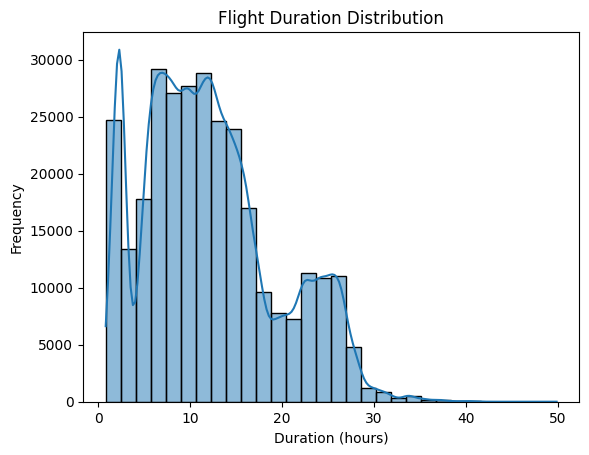

In [12]:

sns.histplot(df['duration'], kde=True, bins=30)
plt.title("Flight Duration Distribution")
plt.xlabel("Duration (hours)")
plt.ylabel("Frequency")
plt.show()


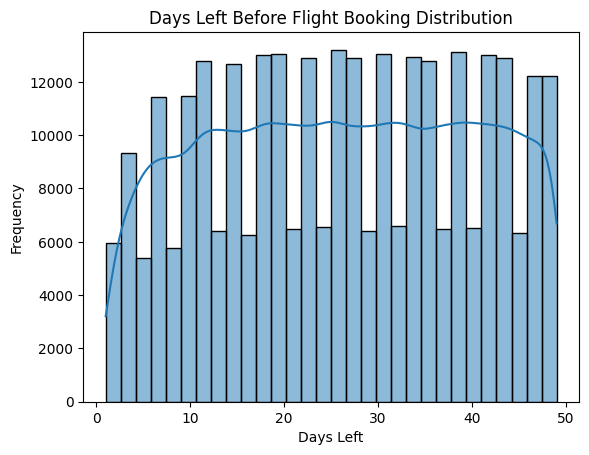

In [13]:
sns.histplot(df['days_left'], kde=True, bins=30)
plt.title("Days Left Before Flight Booking Distribution")
plt.xlabel("Days Left")
plt.ylabel("Frequency")
plt.show()

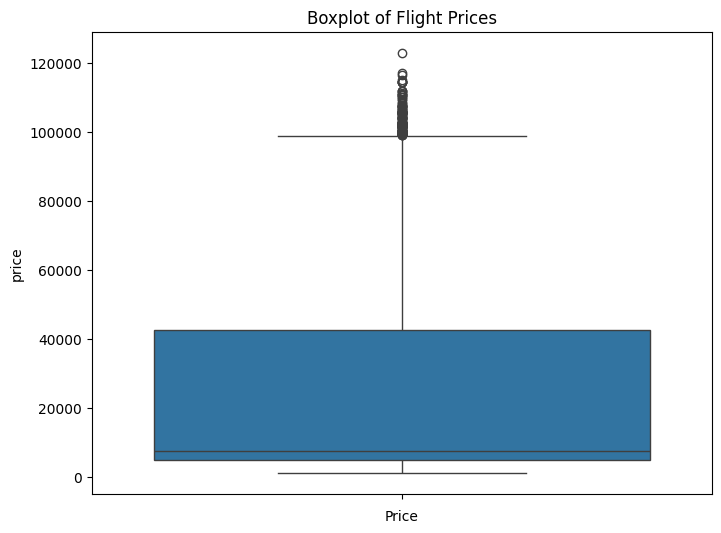

In [14]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['price'])
plt.title("Boxplot of Flight Prices")
plt.xlabel("Price")
plt.show()

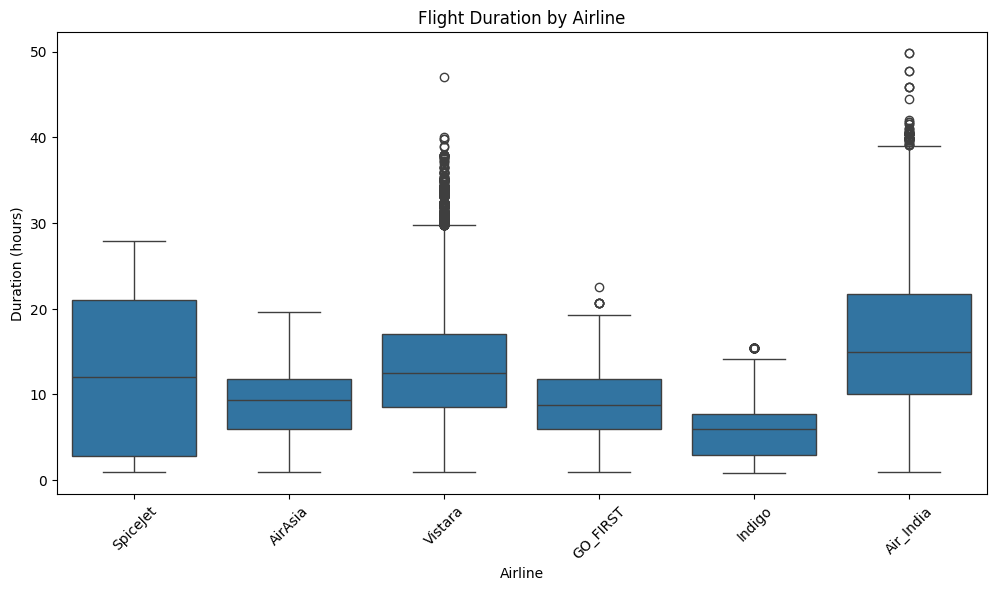

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='airline', y='duration', data=df)
plt.title("Flight Duration by Airline")
plt.xticks(rotation=45)
plt.xlabel("Airline")
plt.ylabel("Duration (hours)")
plt.show()


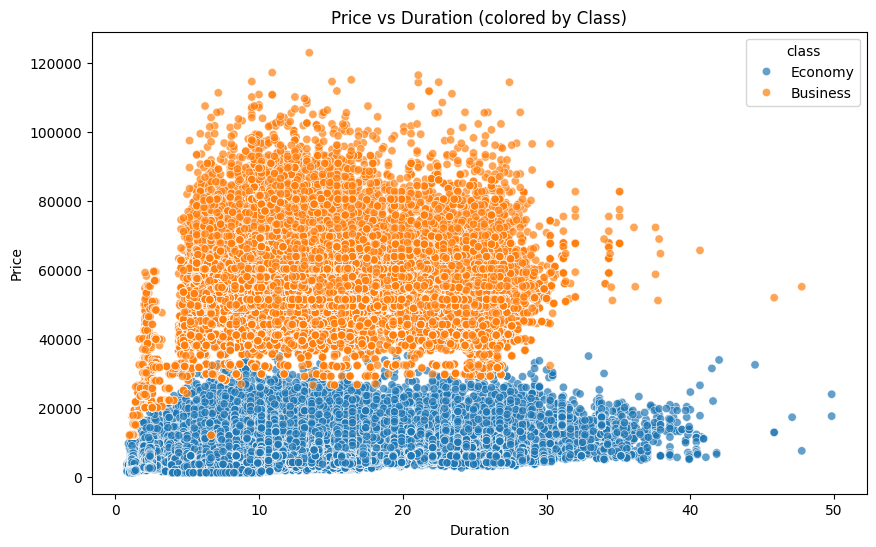

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='duration', y='price', hue='class', alpha=0.7)
plt.title('Price vs Duration (colored by Class)')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()

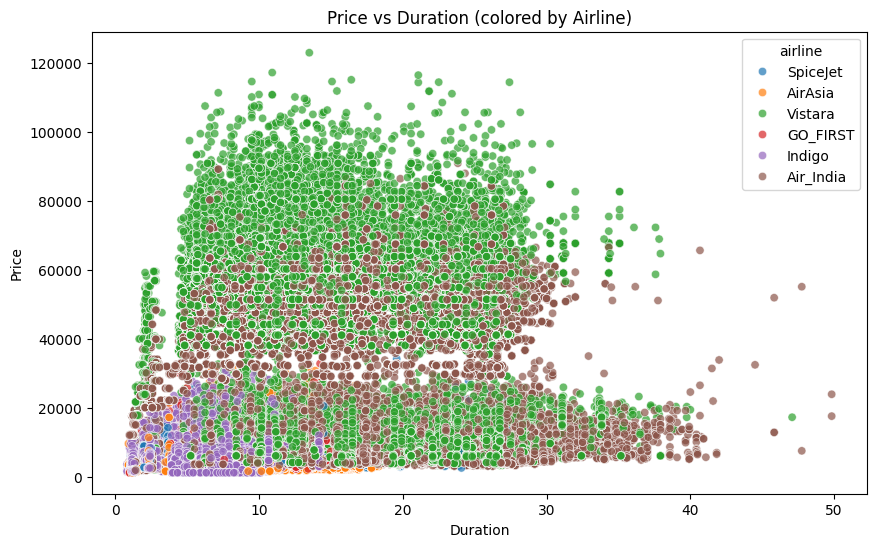

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='duration', y='price', hue='airline', alpha=0.7)
plt.title('Price vs Duration (colored by Airline)')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()


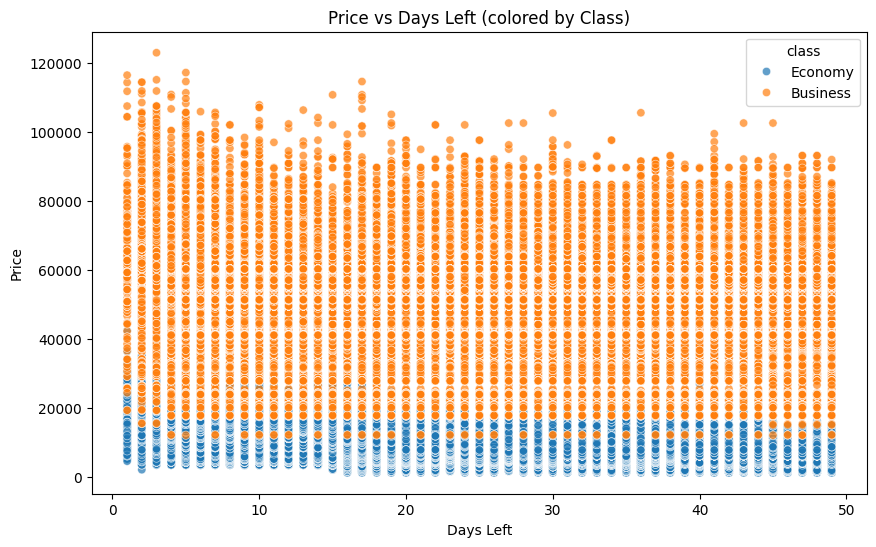

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='days_left', y='price', hue='class', alpha=0.7)
plt.title('Price vs Days Left (colored by Class)')
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.show()

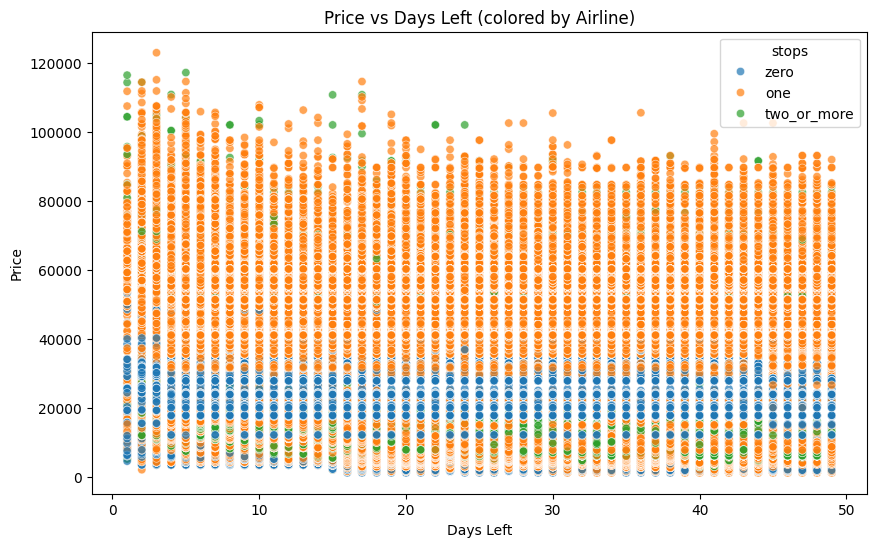

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='days_left', y='price', hue='stops', alpha=0.7)
plt.title('Price vs Days Left (colored by Airline)')
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.show()

Text(0.5, 0, 'Airline')

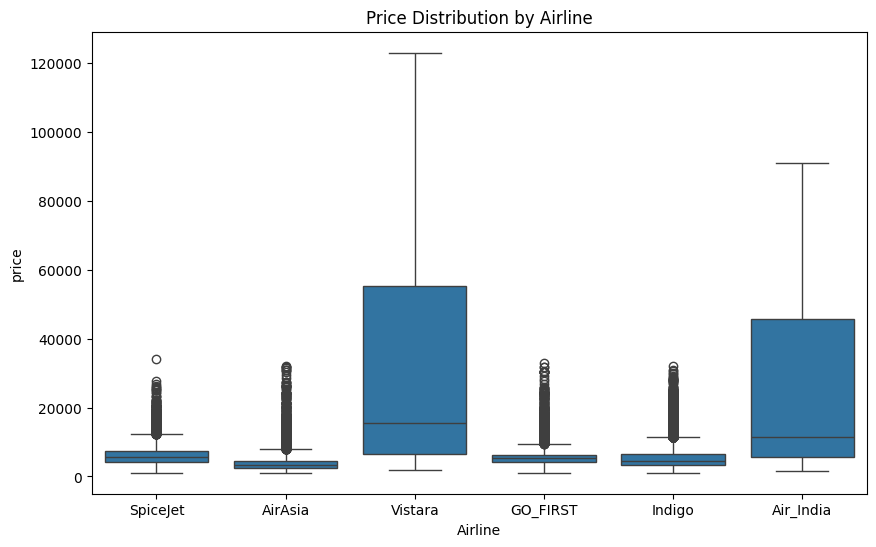

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='airline', y='price', data=df)
plt.title('Price Distribution by Airline')
plt.xlabel('Airline')

Text(0, 0.5, 'Price')

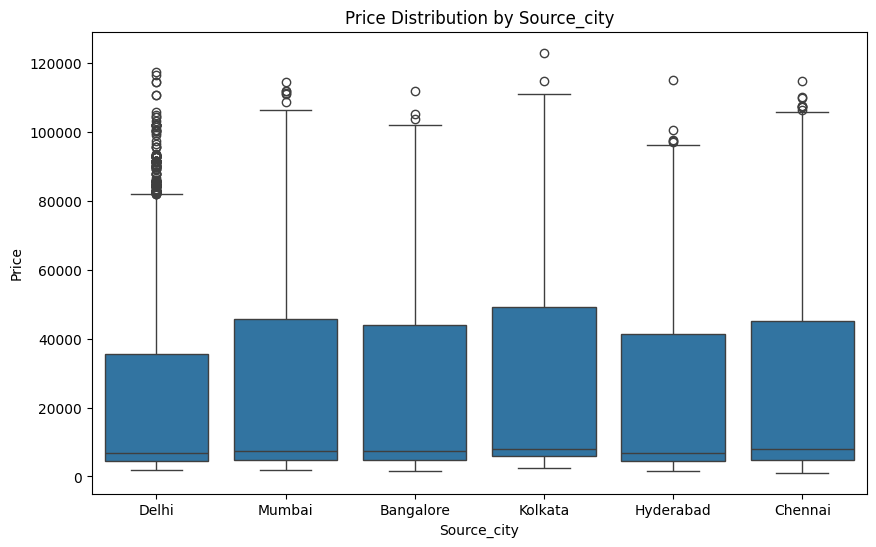

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='source_city', y='price', data=df)
plt.title('Price Distribution by Source_city')
plt.xlabel('Source_city')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

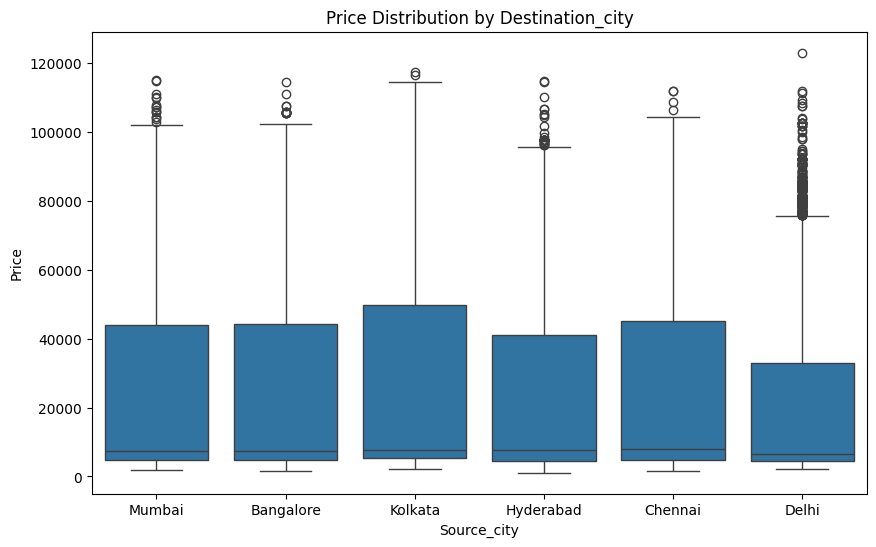

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='destination_city', y='price', data=df)
plt.title('Price Distribution by Destination_city')
plt.xlabel('Source_city')
plt.ylabel('Price')

In [23]:
pivot_route = df.pivot_table(
    values='price',
    index='source_city',
    columns='destination_city',
    aggfunc='mean'
)


In [24]:
pivot_route

destination_city,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
source_city,,,,,,
Bangalore,NaN,23321.850078,17723.313972,21226.121192,23500.061229,23128.618672
Chennai,25081.850454,NaN,18981.863948,21591.345404,22669.932407,22765.849647
Delhi,17880.216315,19369.881354,NaN,17347.288379,20566.409418,19355.829812
Hyderabad,21347.177998,21848.065989,17243.945685,NaN,20823.893201,20080.865759
Kolkata,22744.808428,23660.361040,19422.354559,21500.011397,NaN,22078.883579
Mumbai,23147.873807,22781.899112,18725.320008,21004.046705,22379.146723,NaN


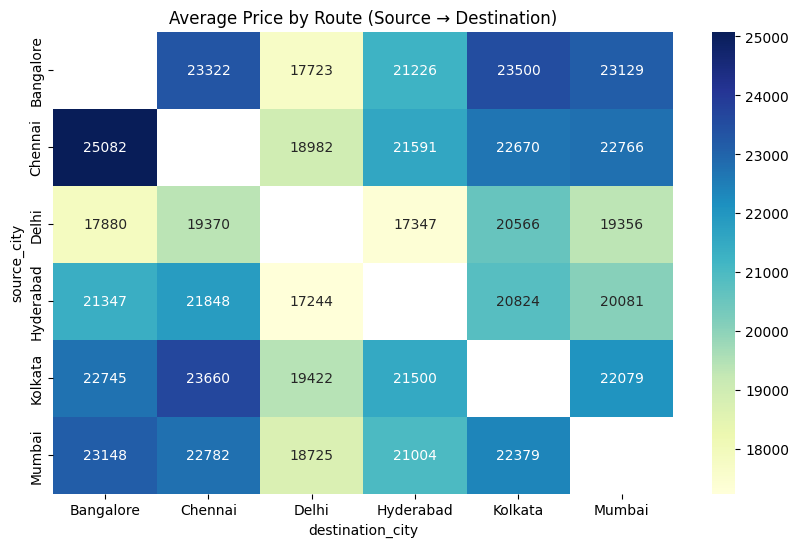

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_route, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Price by Route (Source → Destination)")
plt.show()

In [26]:
pivot_airline = df.pivot_table(
    values='price',
    index='airline',
    columns='class',
    aggfunc='mean'
)


In [27]:
pivot_airline

class,Business,Economy
airline,,
AirAsia,NaN,4091.072742
Air_India,47131.039212,7313.682169
GO_FIRST,NaN,5652.007595
Indigo,NaN,5324.216303
SpiceJet,NaN,6179.278881
Vistara,55477.027777,7806.943645


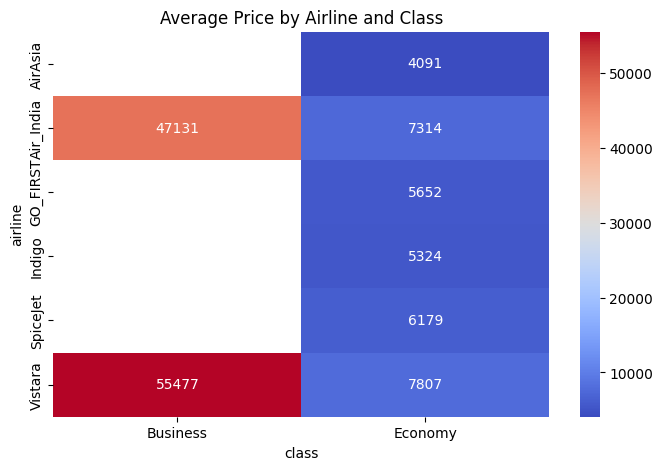

In [28]:
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_airline, annot=True, fmt=".0f", cmap="coolwarm")
plt.title("Average Price by Airline and Class")
plt.show()

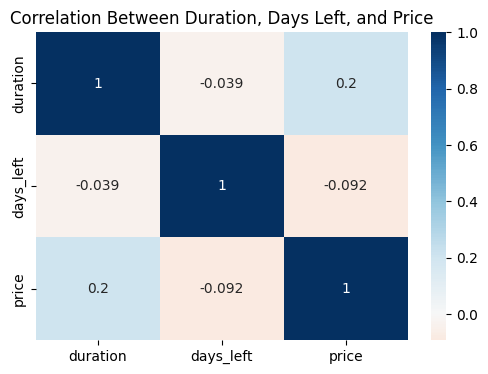

In [29]:
corr_df = df[['duration', 'days_left', 'price']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_df, annot=True, cmap="RdBu", center=0)
plt.title("Correlation Between Duration, Days Left, and Price")
plt.show()


/tmp/ipython-input-2141999220.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='airline', y='price', estimator='mean', ci=None)


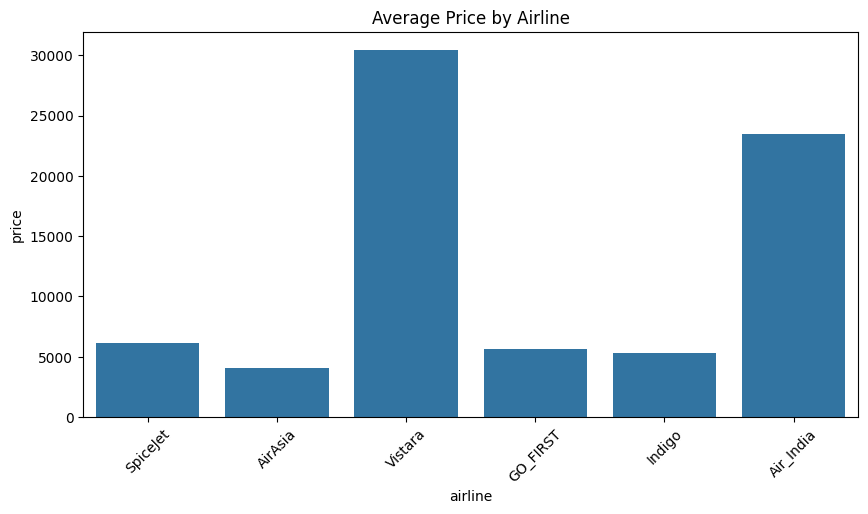

In [30]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='airline', y='price', estimator='mean', ci=None)
plt.title("Average Price by Airline")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-2637273408.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='source_city', y='price', estimator='mean', ci=None)


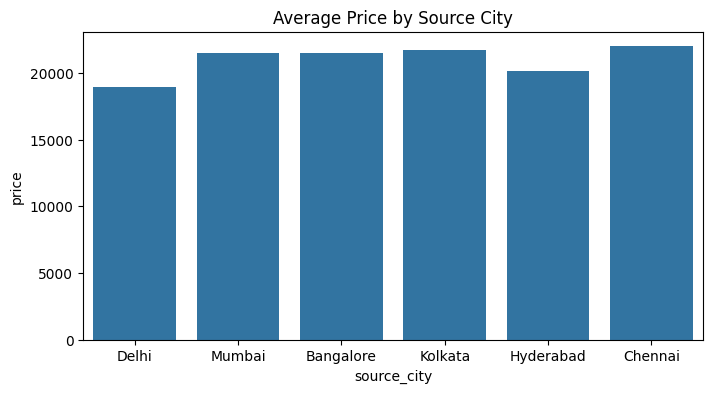

In [31]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x='source_city', y='price', estimator='mean', ci=None)
plt.title("Average Price by Source City")
plt.show()

/tmp/ipython-input-2816261619.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='class', y='price', estimator='mean', ci=None)


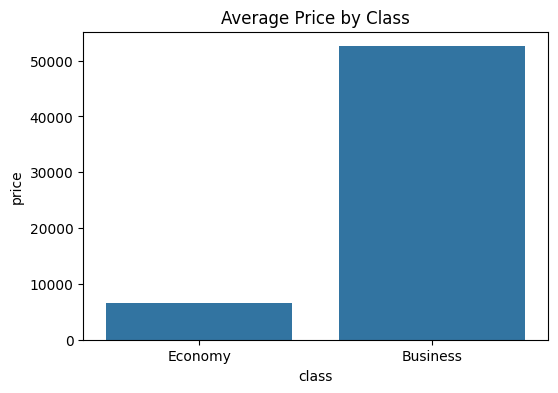

In [32]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='class', y='price', estimator='mean', ci=None)
plt.title("Average Price by Class")
plt.show()


/tmp/ipython-input-3020924719.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='stops', y='price', estimator='mean', ci=None)


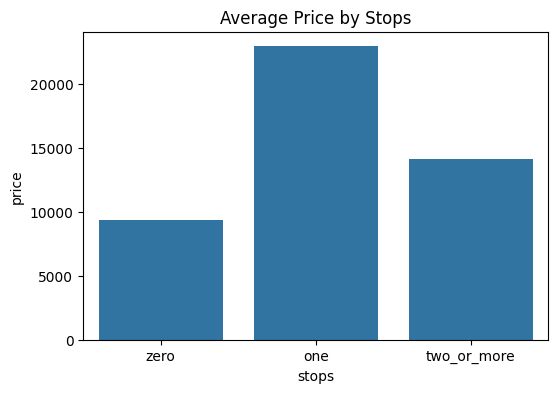

In [33]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='stops', y='price', estimator='mean', ci=None)
plt.title("Average Price by Stops")
plt.show()

In [34]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = df[(df['price'] < (Q1 - 1.5*IQR)) | (df['price'] > (Q3 + 1.5*IQR))]
print(outliers_iqr[['airline','source_city','destination_city','price']])


        airline source_city destination_city   price
215858  Vistara       Delhi          Kolkata  114434
215859  Vistara       Delhi          Kolkata  116562
216025  Vistara       Delhi          Kolkata  100395
216094  Vistara       Delhi          Kolkata   99129
216095  Vistara       Delhi          Kolkata  101369
...         ...         ...              ...     ...
293474  Vistara     Chennai        Bangalore  107597
296001  Vistara     Chennai          Kolkata  102832
296081  Vistara     Chennai          Kolkata  102384
296170  Vistara     Chennai          Kolkata  104624
296404  Vistara     Chennai          Kolkata  102384

[123 rows x 4 columns]


In [35]:
print(df['source_city'].unique())
print(df['destination_city'].unique())
print(df['airline'].unique())

['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']


In [36]:
df_encoded = pd.get_dummies(df, columns=[
    'airline',
    'flight',
    'source_city',
    'destination_city'
], drop_first=True, dtype=int)

In [37]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_features = ['class', 'departure_time', 'arrival_time', 'stops']

encoder = OrdinalEncoder(categories=[
    ['Economy', 'Business'],
    ['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night'],
    ['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night'],
    ['zero', 'one', 'two', 'two_or_more']
])

In [38]:

df_encoded[ordinal_features] = encoder.fit_transform(df_encoded[ordinal_features])

In [39]:
df[['price', 'duration', 'days_left']].skew()

,0
price,1.061377
duration,0.602899
days_left,-0.035464


In [40]:
target_corr = df_encoded.corrwith(df_encoded["price"]).sort_values(ascending=False)
print(target_corr.head(20))
print(target_corr.tail(20))


price                1.000000
class                0.937860
airline_Vistara      0.360816
duration             0.204222
airline_Air_India    0.070041
stops                0.063259
flight_UK-772        0.061652
flight_UK-706        0.054436
flight_UK-810        0.053958
flight_UK-930        0.053524
flight_UK-940        0.053370
flight_UK-970        0.052501
flight_UK-808        0.051893
flight_UK-870        0.051036
flight_UK-820        0.050905
flight_UK-996        0.050847
flight_UK-988        0.050309
flight_UK-836        0.050101
flight_UK-838        0.049925
flight_UK-818        0.049064
dtype: float64
flight_AI-9517           -0.028042
flight_I5-1229           -0.028335
flight_I5-1543           -0.028506
flight_I5-740            -0.028559
flight_6E-841            -0.028875
flight_I5-1518           -0.028960
flight_UK-894            -0.029183
flight_I5-942            -0.029699
flight_6E-6113           -0.029709
flight_6E-605            -0.029875
flight_AI-9894           -0.030007


The Price is right skewed

In [42]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression


y = np.log1p(df_encoded["price"])
X = df_encoded.drop("price", axis=1)


selector = SelectKBest(score_func=f_regression, k=50)
X_new = selector.fit_transform(X, y)

selected_cols = X.columns[selector.get_support()]
print(selected_cols)


Index(['stops', 'class', 'duration', 'days_left', 'airline_Air_India',
       'airline_GO_FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_Vistara', 'flight_6E-605', 'flight_6E-6113', 'flight_6E-841',
       'flight_6E-847', 'flight_I5-1229', 'flight_I5-1518', 'flight_I5-1529',
       'flight_I5-1531', 'flight_I5-1543', 'flight_I5-336', 'flight_I5-740',
       'flight_I5-942', 'flight_I5-972', 'flight_UK-706', 'flight_UK-708',
       'flight_UK-720', 'flight_UK-738', 'flight_UK-772', 'flight_UK-774',
       'flight_UK-776', 'flight_UK-778', 'flight_UK-802', 'flight_UK-808',
       'flight_UK-810', 'flight_UK-812', 'flight_UK-814', 'flight_UK-816',
       'flight_UK-818', 'flight_UK-820', 'flight_UK-824', 'flight_UK-832',
       'flight_UK-836', 'flight_UK-838', 'flight_UK-860', 'flight_UK-870',
       'flight_UK-928', 'flight_UK-930', 'flight_UK-940', 'flight_UK-970',
       'flight_UK-988', 'destination_city_Delhi'],
      dtype='object')


In [43]:
from sklearn.model_selection import train_test_split

X_selected = X[selected_cols]
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)


In [44]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [45]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 0.2637173538328715
MSE: 0.11391596357188577
RMSE: 0.33751439017008705
R²: 0.9080241508109721


In [47]:
y_train_pred = model.predict(X_train_scaled)

mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

print("Training Set Evaluation")
print("MAE:", mae_train)
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("R2:", r2_train)


Training Set Evaluation
MAE: 0.26527904572240446
MSE: 0.11524181733339645
RMSE: 0.33947285213017614
R2: 0.9069067096272311


### NO overfitting or underfitting because the train metrics and test is near and the mode has low error and good R squared

In [48]:
import joblib

joblib.dump(model, "linear_model.pkl")

loaded_model = joblib.load("linear_model.pkl")